In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
iris = pd.read_csv("data_with_nans.csv")
df = iris.copy()
df.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [4]:
df.columns

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')

In [5]:
df.drop(columns=[df.columns[0]],inplace=True)

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [7]:
df[df.isna().any(axis=1)]

## Nan degerler

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,50,5.1,3.8,NaN,0.2,Iris-setosa
51,51,NaN,3.7,1.5,0.4,Iris-setosa
52,52,5.3,3.7,NaN,0.2,Iris-setosa
53,53,4.6,NaN,1.4,0.3,Iris-setosa
54,54,4.4,3.0,1.3,NaN,Iris-setosa
59,59,NaN,2.3,1.3,0.3,Iris-setosa
98,98,6.3,3.3,NaN,1.6,Iris-versicolor
109,109,NaN,2.9,4.5,1.5,Iris-versicolor
113,113,6.1,2.9,NaN,1.4,Iris-versicolor
160,160,5.8,2.8,5.1,NaN,Iris-virginica


In [207]:
df.eq(0).any()

## Değerlerde 0 olmaması gerekiyor. 0 olan değer var mı kontrolü yapıldı

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,170.0,84.500000,49.218899,0.0,42.25,84.5,126.75,169.0
SepalLengthCm,167.0,5.826347,0.827189,4.3,5.10,5.8,6.40,7.9
SepalWidthCm,169.0,3.072781,0.447578,2.0,2.80,3.0,3.40,4.4
PetalLengthCm,166.0,3.707229,1.789382,1.0,1.50,4.3,5.10,6.9
PetalWidthCm,168.0,1.180357,0.765049,0.1,0.30,1.3,1.80,2.5


In [ ]:
for i in df.columns[1:-1]:
    plt.figure(figsize=(10,3))
    sbn.scatterplot(data=df,hue="Species",x="Id",y=i)

#### Outliers

In [12]:
for column in df.columns[1:-1]:
    for spec in df["Species"].unique():
        selected_spec = df[df["Species"] == spec]
        selected_column = selected_spec[column]
        
        std = selected_column.std()
        avg = selected_column.mean()
        
        three_sigma_plus = avg + (3 * std)
        three_sigma_minus = avg - (3 * std)
        
        outliers = selected_column[((selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus))].index
        print(outliers)
        df.drop(index = outliers, inplace=True)

Index([14], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([90], dtype='int64')
Index([], dtype='int64')
Index([27], dtype='int64')
Index([], dtype='int64')
Index([144], dtype='int64')
Index([43, 55], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')


In [ ]:
for i in df.columns[1:-1]:
    plt.figure(figsize=(10,3))
    sbn.scatterplot(data=df,hue="Species",x="Id",y=i)
    

<Axes: >

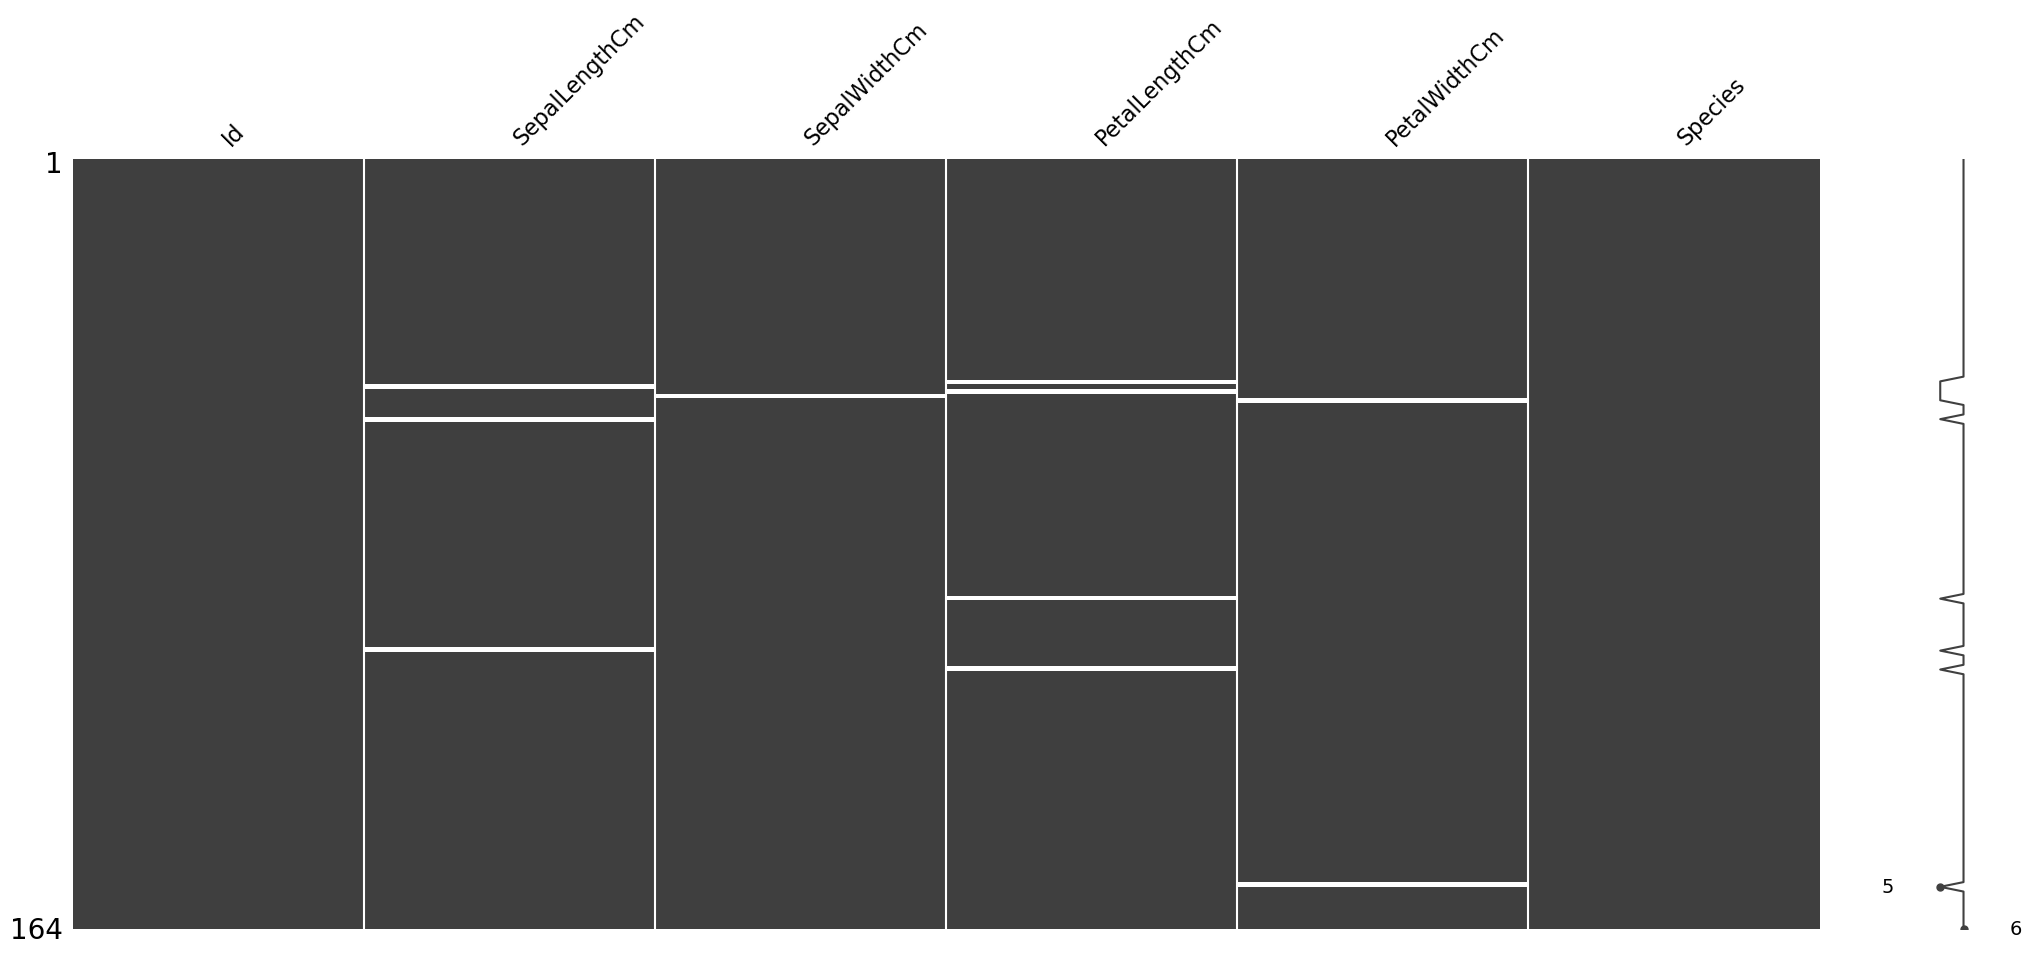

In [14]:
import missingno as msno
msno.matrix(df)

### Veriyi bölme 

In [16]:
df = df.drop(columns="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.7,3.2,1.6,0.2,Iris-setosa
2,4.9,3.1,1.5,0.1,Iris-setosa
3,4.4,2.9,1.4,0.2,Iris-setosa
4,5.0,3.4,1.5,0.2,Iris-setosa


In [17]:
X = df.drop(columns="Species")
Y = df["Species"]

In [135]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,stratify=df.iloc[:, -1])

In [137]:
print("test")
print(x_test.count())
print("train")
print(x_train.count())

test
SepalLengthCm    48
SepalWidthCm     50
PetalLengthCm    49
PetalWidthCm     49
dtype: int64
train
SepalLengthCm    113
SepalWidthCm     113
PetalLengthCm    111
PetalWidthCm     113
dtype: int64


In [139]:
print("y_train")
print(y_train.value_counts())
print("y_test")
print(y_test.value_counts())

y_train
Species
Iris-setosa        39
Iris-virginica     38
Iris-versicolor    37
Name: count, dtype: int64
y_test
Species
Iris-setosa        17
Iris-virginica     17
Iris-versicolor    16
Name: count, dtype: int64


- Nan değerler simple imputer veya fillna ile doldurulacak
    - Veri sızıntısı olmaması için (istatiksel verilerin ortalama dağılımı değişmemesi) veriler train-test olarak ayrıldıktan sonra bu işlemler gerçekleştiriliyor
- Normalizasyon-Standardizasyon
- Encoding (label-onehot)

In [142]:
from sklearn.impute import SimpleImputer

In [144]:
type(x_train)

pandas.core.frame.DataFrame

In [146]:
columnss = df.columns[:-1]
columnss

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [148]:
imputer = SimpleImputer(strategy="mean")
imputed_data  = imputer.fit_transform(x_train)
imputed_data_df = pd.DataFrame(imputed_data, columns=columnss)
x_train = imputed_data_df.round(2)

In [150]:
x_test = x_test.fillna(x_test.mean()).round(2)

In [152]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [180]:
le = LabelEncoder()
y_train = le.fit_transform(y_train.ravel())
y_test = le.transform(y_test.ravel())

- Veriler model egitimi için hazir

In [190]:
alphas = 10**np.linspace(10,-2,100)*0.5

models = {
    'Logistic Regression': LogisticRegression(),
    'Ridge':Ridge(),
    'RidgeCV': RidgeCV(alphas=alphas, cv = 5, scoring="neg_mean_absolute_error"),
    'Lasso': Lasso(),
    'LassoCV' : LassoCV(alphas=None, cv=10, max_iter=10000),
    'ElasticNet': ElasticNet(),
    'ElasticNetCV': ElasticNetCV(cv = 10, random_state=1),
}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(model_name)
    mean_abs = mean_absolute_error(y_test,y_pred)
    r_mean_sq = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    print(f"mae : {mean_abs}")
    print(f"rmse : {mean_sq}")
    print(f"r2 score : {r2}")
    print("-"*30)


Logistic Regression
mae : 0.08
rmse : 0.2571355684927677
r2 score : 0.8823529411764706
------------------------------
Ridge
mae : 0.1880066217467906
rmse : 0.2571355684927677
r2 score : 0.9040057446326363
------------------------------
RidgeCV
mae : 0.19084911045294056
rmse : 0.2571355684927677
r2 score : 0.9017642653728124
------------------------------
Lasso
mae : 0.6828070175438598
rmse : 0.2571355684927677
r2 score : -0.00011315698948100028
------------------------------
LassoCV
mae : 0.1890803237222929
rmse : 0.2571355684927677
r2 score : 0.9027704563205692
------------------------------
ElasticNet
mae : 0.5278538385567241
rmse : 0.2571355684927677
r2 score : 0.43893828867816087
------------------------------
ElasticNetCV
mae : 0.18865250980520784
rmse : 0.2571355684927677
r2 score : 0.9027666167880899
------------------------------


- Logistic Regression :
    - mae : 0.08
    - rmse : 0.2571355684927677    
    - r2 score : 0.88235294117647
    - diğer tekniklere göre LR, daha iyi bir performans gösteriyor gibi gözüküyor.

- Veri hazırlama süreçlerinde sıklıkla yapılan hatalardan bazıları incelendi.
- Özellikle veriler train/test olarak ayrılmadan eksik değerlerin ortalama ile doldurulması, encode ve scaling yapılması...

- Lasso, Ridge ve ElasticNet regülarizasyon kullanılarak model performansı incelendi.
- Veri seti karmaşık ve büyük değil. Lasso ve ElasticNet modellerinde fazla sadeleştirme olduğu için bu modeller veriyi açıklayamıyor.
- LR, Ridge ve RidgeCV modelleri genelleme yetenekleri bakımından bu şekilde sıralanabilir.
